links to process ['https://varta1.com.ua/news/u-gur-rozpovili-shcho-rosiya-pochala-zminyuvati-taktiku-obstriliv-ukrayini_358895.html', 'https://varta1.com.ua/news/u-minreintegraciyi-povidomili-skilki-ukrayinciv-vdalosya-povernuti-z-polonu-rf-vid-pochatku-viyni_358894.html', 'https://varta1.com.ua/news/v-op-poyasnili-riznicyu-u-zayavah-budanova-i-stoltenberga_358893.html', 'https://varta1.com.ua/news/golovna-yalinka-ukrayini-uviyshla-do-p-yatirki-naykrashchih-u-sviti_358892.html', 'https://varta1.com.ua/news/u-dvoh-zahidnih-oblastyah-ogolosili-pro-tretiy-riven-nebezpeki-detalnishe_358891.html', 'https://varta1.com.ua/news/ievropeyska-krayina-povnistyu-zupinila-import-rosiyskogo-gazu_358890.html', 'https://varta1.com.ua/news/stalo-vidomo-stilki-povitryanih-trivog-prolunalo-v-ukrayini-u-2022-roci-infografika_358889.html', 'https://varta1.com.ua/news/u-novorichnu-nich-okupanti-dvichi-sprobuvali-vbiti-ditinu_358888.html', 'https://varta1.com.ua/news/okupanti-pid-bahmutom-potrebuyut-operativ

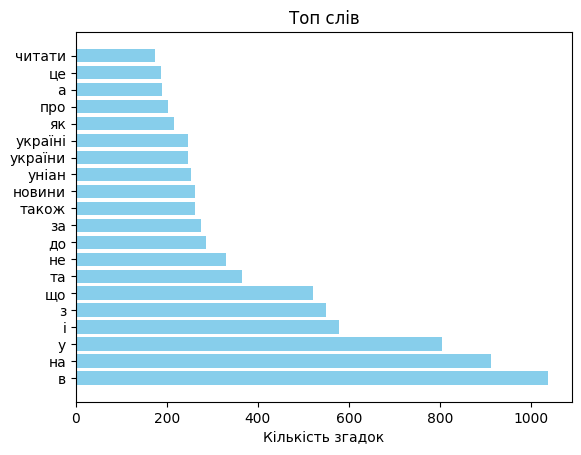

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from collections import Counter
import re
import calendar
import matplotlib.pyplot as plt

driver = webdriver.Chrome()

format_link = lambda y, m, d: f"https://varta1.com.ua/archive/{y}-{m}-{d}/"
format_link2 = lambda y, m, d: f"https://www.pravda.com.ua/archives/date_{str(d).zfill(2)}{str(m).zfill(2)}{str(y).zfill(2)}/"
format_link3 = lambda y, m, d: f"https://www.unian.ua/news/archive/{str(y).zfill(2)}{str(m).zfill(2)}{str(d).zfill(2)}/"

textes = []

def analyze_texts(texts, num):
    all_text = ' '.join(texts)

    all_text = all_text.lower()

    all_text = re.sub(r'[^\w\s]', '', all_text)

    word_freq = Counter(all_text.split())

    return word_freq.most_common(num)

def process_page_news_page(href: str):
    driver.get(href)
    try:
        print('processing', href)
        try:
            main = driver.find_element(By.CLASS_NAME, "main")
        except:
            try:
                main = driver.find_element(By.CSS_SELECTOR, "main")
            except:
                main = driver.find_element(By.ID, "block_left_column_content")
        text = main.text
        driver.back()
        return text

    except:
        driver.back()
        return ""


def process_page_news():
    links = [a for a in driver.find_elements(By.CSS_SELECTOR, "div#categories article.post > a[href]")]
    if not links:
        links = [a for a in driver.find_elements(By.CSS_SELECTOR, "div.container_sub_articles_list_2nd .article_header a[href]")]
    if not links:
        links = [a for a in driver.find_elements(By.CSS_SELECTOR, "div.content-column .list-thumbs__info a[href]")]
    links = [a.get_attribute("href") for a in links]
    print('links to process', links)
    for link in links:
        text = process_page_news_page(link)
        textes.append(text)


def main(format_link):
    for year in [2023]:
        for month in [1]:
                day = 1
                driver.get(format_link(year, month, day))
                process_page_news()


if __name__ == '__main__':
    main(format_link)
    main(format_link2)
    main(format_link3)
    result = analyze_texts(textes, 20)
    labels, values = zip(*result)

    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Кількість згадок')
    plt.title('Топ слів')

    plt.show()
    driver.close()

